In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import requests
import matplotlib.pyplot as plt

In [ ]:
redditcomments_df = pd.read_csv('/content/reddit_analysis.csv') # read in csv file

In [ ]:
print("Number of useless comments: ", (redditcomments_df['to remove useless comment \n(0: useful \n1: useless)'] == 1).sum()) # get count of num of useless data

Number of useless comments:  1362


In [ ]:
# drop all rows of data marked as useless
usefulRedditcomments = redditcomments_df[redditcomments_df['to remove useless comment \n(0: useful \n1: useless)'] != 1].reset_index(drop=True)
usefulRedditcomments

In [ ]:
# drop unlabelled rows of data
usefulRedditcomments = usefulRedditcomments.dropna(subset=['subjectivity \n{0: neutral,1\n: subjective}']).reset_index(drop=True)
# separate neutral from subjective commments
sentimentRedditcomments = usefulRedditcomments[usefulRedditcomments['subjectivity \n{0: neutral,1\n: subjective}'] == 1].reset_index(drop=True) 

In [ ]:
usefulRedditcomments['subjectivity \n{0: neutral,1\n: subjective}'].value_counts()

In [ ]:
sentimentRedditcomments['polarity \n{0: negative, \n1: positive}'].value_counts()

1.0    528
0.0    432
Name: polarity \n{0: negative, \n1: positive}, dtype: int64

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)

sb.countplot(x=usefulRedditcomments["subjectivity \n{0: neutral,1\n: subjective}"], ax=ax[0])
sb.countplot(x=sentimentRedditcomments["polarity \n{0: negative, \n1: positive}"], ax=ax[1])

# senticAPI

In [ ]:
usefulRedditcomments = usefulRedditcomments.replace(r'\r+|\n+|\t+','', regex=True) # remove \n's

In [ ]:
illegalSenticChars = ['&', '#', ';', '{', '}'] 

for c in illegalSenticChars:
  usefulRedditcomments['body'] = usefulRedditcomments["body"].str.replace(c,"")

<ipython-input-111-268c83f7c336>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  usefulRedditcomments['body'] = usefulRedditcomments["body"].str.replace(c,"")


In [ ]:
subjectivity = []
for text_ in usefulRedditcomments['body']:
  URL = "http://sentic.net/api/en/7bLlqPJJ5u6skskoWLC.py?text=" + text_
  page = requests.get(URL)
  subjectivity.append(page.text.replace('\n','')) # remove \n's

<AxesSubplot:ylabel='count'>

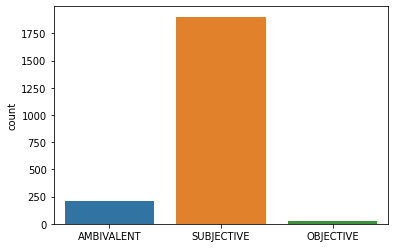

In [ ]:
sb.countplot(x=subjectivity)

In [ ]:
URL = "http://sentic.net/api/en/vcDLt0xjUXnNBd.py?text=" + text_
page = requests.get(URL)
page.text

'0%\n'

In [ ]:
usefulRedditcomments['senticSubjectivity'] = subjectivity

In [ ]:
usefulRedditcomments['subjectivity \n{0: neutral,1\n: subjective}'] == 0

0        True
1       False
2       False
3       False
4       False
        ...  
2134     True
2135    False
2136    False
2137    False
2138    False
Name: subjectivity \n{0: neutral,1\n: subjective}, Length: 2139, dtype: bool

In [ ]:
sentiment = []
for i, text_ in enumerate(usefulRedditcomments['body']):
  URL = "http://sentic.net/api/en/HgA8p0lSLC37bfs.py?text=" + text_
  page = requests.get(URL)
  sentiment.append(page.text.replace('\n','')) # remove \n's

<AxesSubplot:ylabel='count'>

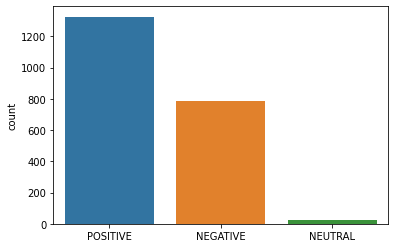

In [ ]:
sb.countplot(x=sentiment)

In [ ]:
usefulRedditcomments['senticSentiment'] = sentiment